<h1><u>Observable Trends</u></h1>
All mice started with the same tumor size, however, <font color ="#FF0000"><i>Capomulin</i></font> was the only drug to actually reduce tumor size to a meaningful degree.(-19%)<br>

There was a very <i>slight</i> (one) increase in metastatic sites about half way through the study with <font color ="#FF0000"><i>Capomulin</i></font>.<br>

Overall, the number of <font color ="#FF0000"><i>Capomulin</i></font> mice that survived is much higher than the others.<br>

None of the other drugs reduced metastisis.<br>

The drug <font color="#CC00CD"><i>Ketapril</i></font> performed <i><b>worse</i></b> than <font color="#00FFFF"><i>Placebo</i></font> in terms of metastsis and tumor size. Survival rate plateaued for 10 days, with a parabolic drop, indicating possible effacacy unrelated to tumor size/metasis as a mechanism of action for prolonging mouse life.

Because mestasis and tumor size are comparable in all of the drugs besides <font color ="#FF0000"><i>Capomulin</i></font>, no inference can be made about the survival rate based on the intended effects of these drugs. Therefore, the survival rate based on the efficacy of these other drugs is meaningless. See next point.

Although <font color="#8B008B"><i>Infubinol</i></font> perfomed <i>slightly</i> better than <font color="#00FFFF"><i>Placebo</i></font>, it killed mice. The mouse survival rate for that drug was both erratic and the lowest. Would investigate toxicity of this drug. Using the control as an indicator of death by natural cause, around day 32, the death rate for this drug dips sharply below (~10%) that of the control, indicating toxicity due to exposure over time with a cumulitive effect on organ systems.

In a clinical setting, <font color ="#FF0000"><i>Capomulin</i></font> merits further study for drug discovery.

In a research setting <font color="#8B008B"><i>Infubinol</i></font> is of interest due to toxicity, while <font color="#CC00CD"><i>Ketapril</i></font> should have metabolic studies done as a possible candidate for use other than SCC. (More surviving mice than control, though no effect on this type of cancer.)

In [1]:
# Dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in data
trial_data_df = pd.read_csv("clinicaltrial_data.csv")
drug_data_df = pd.read_csv("mouse_drug_data.csv")

In [3]:
drug_data_df.head()

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn

In [4]:
#merge dfs
merge1_df = pd.merge(trial_data_df,drug_data_df, how = 'left', on ="Mouse ID")

In [5]:
merge1_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

In [6]:
#filter by drug
capomulin = merge1_df[merge1_df["Drug"]=="Capomulin"]
infubinol = merge1_df[merge1_df["Drug"]=="Infubinol"]
ketapril = merge1_df[merge1_df["Drug"]=="Ketapril"]
placebo = merge1_df[merge1_df["Drug"]=="Placebo"]

In [51]:
#capomulin.head()

In [8]:
#timepoints by drug
cap_data = capomulin.groupby(["Drug","Timepoint"]).mean()
inf_data = infubinol.groupby(["Drug","Timepoint"]).mean()
ket_data = ketapril.groupby(["Drug","Timepoint"]).mean()
pla_data = placebo.groupby(["Drug","Timepoint"]).mean()

In [52]:
#cap_data.head()

In [10]:
#standard error mean
cap_err = capomulin.groupby(["Drug","Timepoint"]).sem()
inf_err = infubinol.groupby(["Drug","Timepoint"]).sem()
ket_err = ketapril.groupby(["Drug","Timepoint"]).sem()
pla_err = placebo.groupby(["Drug","Timepoint"]).sem()

In [53]:
#cap_err.head()

In [12]:
cap_data.reset_index(inplace=True)
inf_data.reset_index(inplace=True)
ket_data.reset_index(inplace=True)
pla_data.reset_index(inplace=True)

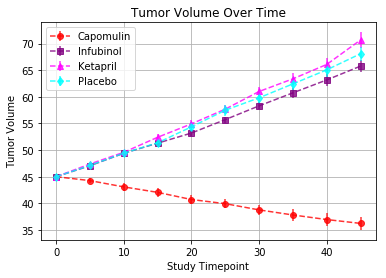

In [13]:
#scatter tumor/time
plt.errorbar(cap_data["Timepoint"], cap_data["Tumor Volume (mm3)"], yerr = cap_err["Tumor Volume (mm3)"], 
             c = "r", marker="o", linestyle = "dashed", alpha=0.8, label="Capomulin")

plt.errorbar(inf_data["Timepoint"], inf_data["Tumor Volume (mm3)"], yerr = inf_err["Tumor Volume (mm3)"], 
             c = "purple", marker="s", linestyle = "dashed", alpha=0.8, label="Infubinol")

plt.errorbar(ket_data["Timepoint"], ket_data["Tumor Volume (mm3)"], yerr = ket_err["Tumor Volume (mm3)"], 
             c = "magenta", marker="^", linestyle = "dashed", alpha=0.8, label="Ketapril")

plt.errorbar(pla_data["Timepoint"], pla_data["Tumor Volume (mm3)"], yerr = pla_err["Tumor Volume (mm3)"], 
             c = "cyan", marker="d", linestyle = "dashed", alpha=0.8, label="Placebo")
plt.grid(True)

# x-axis labels, y-axis labels, title, legend

plt.title("Tumor Volume Over Time")
plt.xlabel("Study Timepoint")
plt.ylabel("Tumor Volume")

plt.legend(loc="best")

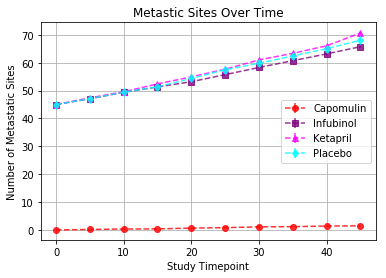

In [14]:
#Number of metastatic sites
plt.errorbar(cap_data["Timepoint"], cap_data["Metastatic Sites"], yerr = cap_err["Metastatic Sites"], 
             c = "r", marker="o", linestyle = "dashed", alpha=0.8, label="Capomulin")

plt.errorbar(inf_data["Timepoint"], inf_data["Tumor Volume (mm3)"], yerr = inf_err["Metastatic Sites"], 
             c = "purple", marker="s", linestyle = "dashed", alpha=0.8, label="Infubinol")

plt.errorbar(ket_data["Timepoint"], ket_data["Tumor Volume (mm3)"], yerr = ket_err["Metastatic Sites"], 
             c = "magenta", marker="^", linestyle = "dashed", alpha=0.8, label="Ketapril")

plt.errorbar(pla_data["Timepoint"], pla_data["Tumor Volume (mm3)"], yerr = pla_err["Metastatic Sites"], 
             c = "cyan", marker="d", linestyle = "dashed", alpha=0.8, label="Placebo")
plt.grid(True)

# x-axis labels, y-axis labels, title, legend

plt.title("Metastic Sites Over Time")
plt.xlabel("Study Timepoint")
plt.ylabel("Number of Metastatic Sites")

plt.legend(loc="best")

In [15]:
#living mice

cap_mouse = capomulin.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
inf_mouse = infubinol.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
ket_mouse = ketapril.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
pla_mouse = placebo.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]

In [16]:
#survival rate

cap_surv = cap_mouse/(cap_mouse[0])*100
inf_surv = inf_mouse/(inf_mouse[0])*100
ket_surv = ket_mouse/(ket_mouse[0])*100
pla_surv = pla_mouse/(pla_mouse[0])*100

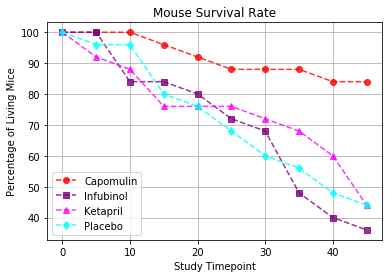

In [17]:
#scatter plot living mice
plt.plot(cap_data["Timepoint"],cap_surv, 
         c = "r", marker="o", linestyle = "dashed", alpha=0.8, label="Capomulin")
plt.plot(inf_data["Timepoint"],inf_surv, 
         c = "purple", marker="s", linestyle = "dashed", alpha=0.8, label="Infubinol")
plt.plot(ket_data["Timepoint"],ket_surv, 
         c = "magenta", marker="^", linestyle = "dashed", alpha=0.8, label="Ketapril")
plt.plot(pla_data["Timepoint"],pla_surv, 
         c = "cyan", marker="d", linestyle = "dashed", alpha=0.8, label="Placebo")
plt.grid(True)
plt.title("Mouse Survival Rate")
plt.xlabel("Study Timepoint")
plt.ylabel("Percentage of Living Mice")

plt.legend(loc="best")

In [18]:
#mean tumor volume change per drug
cap_mean = capomulin.groupby(["Timepoint"]).mean()
inf_mean = infubinol.groupby(["Timepoint"]).mean()
ket_mean = ketapril.groupby(["Timepoint"]).mean()
pla_mean = placebo.groupby(["Timepoint"]).mean()

In [19]:
#percentage tumor volume change per drug
cap_delta = (100 * (cap_mean.iloc[-1] - cap_mean.iloc[0]) / cap_mean.iloc[0])
inf_delta = (100 * (inf_mean.iloc[-1] - inf_mean.iloc[0]) / inf_mean.iloc[0])
ket_delta = (100 * (ket_mean.iloc[-1] - ket_mean.iloc[0]) / ket_mean.iloc[0])
pla_delta = (100 * (pla_mean.iloc[-1] - pla_mean.iloc[0]) / pla_mean.iloc[0])



In [20]:
#removing Metastatic Sites
cap_per = cap_delta["Tumor Volume (mm3)"]
inf_per = inf_delta["Tumor Volume (mm3)"]
ket_per = ket_delta["Tumor Volume (mm3)"]
pla_per = pla_delta["Tumor Volume (mm3)"]

In [21]:
final_tumor_percent = [cap_per,inf_per,ket_per,pla_per]

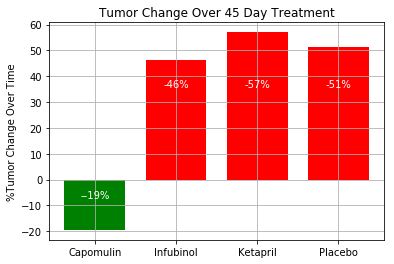

In [50]:
#bar graph of percent of mean tumor volume size change 
fig, ax = plt.subplots()
ind = np.arange(len(final_tumor_percent))

ax.set_xticks(ind)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("%Tumor Change Over Time")
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
width = 0.75
rect_pass = ax.bar(ind[0], final_tumor_percent[0], width, color = "green")
rect_fail = ax.bar(ind[1:], final_tumor_percent[1:], width, color = "red")

plt.grid(True)

def label_per_pass(rect_pass):
    for rect in rect_pass:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, -8,
         '-%d%%' % int(height),
           ha='center', va='bottom', color='white')

def label_per_fail(rect_fail):
    for rect in rect_fail:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 35,
         '-%d%%' % int(height),
           ha='center', va='bottom', color='white')

label_per_fail(rect_fail)
label_per_pass(rect_pass)